<a href="https://www.kaggle.com/code/rakeshrk07/ipl-team-dynamics-eda?scriptVersionId=158184394" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-auction-2023/iplauction2023.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

![](https://i.postimg.cc/JhZDN10S/490b33e8-123a-4771-a2c2-e51b55a9ac43.jpg)

**This notebook delves into the fascinating world of IPL player auctions, using data visualization to uncover hidden trends and insights. We'll explore how player value, franchise strategies, playing styles, and even nationalities influence the auction dynamics. Dive into captivating visuals like price scatterplots, franchise breakdowns, and performance correlations to reveal the secrets behind who gets sold, retained, and ultimately, who rules the IPL**

In [3]:
df=pd.read_csv('/kaggle/input/ipl-auction-2023/iplauction2023.csv')

In [4]:
df

,Unnamed: 0,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,0,Harshit Rana,Bowler,India,20.0,20.0,KKR,RETAINED
1,1,Ekant Sen,Batter,India,20.0,150.0,CSK,UNSOLD
2,2,Wayne Parnell,Allrounder,South Africa,75.0,150.0,CSK,UNSOLD
3,3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...,...
304,304,MS Dhoni,WK-Batter,India,20.0,1200.0,CSK,RETAINED
305,305,Moeen Ali,Allrounder,England,20.0,800.0,CSK,RETAINED
306,306,Ruturaj Gaikwad,Batter,India,20.0,600.0,CSK,RETAINED
307,307,Rishabh Pant,WK-Batter,India,20.0,1600.0,DC,RETAINED


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             309 non-null    int64  
 1   name                   309 non-null    object 
 2   player style           309 non-null    object 
 3   nationality            309 non-null    object 
 4   base price (in lacs)   309 non-null    float64
 5   final price (in lacs)  309 non-null    float64
 6   franchise              309 non-null    object 
 7   status                 309 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 19.4+ KB


In [6]:
df.describe()

,Unnamed: 0,base price (in lacs),final price (in lacs)
count,309.000000,309.000000,309.000000
mean,154.000000,39.158576,317.961165
std,89.344838,46.047732,404.499312
min,0.000000,20.000000,20.000000
25%,77.000000,20.000000,50.000000
50%,154.000000,20.000000,150.000000
75%,231.000000,20.000000,400.000000
max,308.000000,200.000000,1850.000000


##### From the above matrix you can see the max final price is 1850 Lac and min is 20 lakh 

In [7]:
df.isna().sum()

Unnamed: 0               0
name                     0
player style             0
nationality              0
base price (in lacs)     0
final price (in lacs)    0
franchise                0
status                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

There are no missing value present in our Data and no doplicate row in the dataset 

### Player vs Sold price Analysis 

In [9]:
most_expensive_players=df[df['final price (in lacs)']==df['final price (in lacs)'].max()]
most_expensive_players

,Unnamed: 0,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
150,150,Sam Curran,Allrounder,England,200.0,1850.0,PBKS,SOLD


In [10]:
least_expensive_players=df[df['final price (in lacs)']==df['final price (in lacs)'].min()]
least_expensive_players

,Unnamed: 0,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,0,Harshit Rana,Bowler,India,20.0,20.0,KKR,RETAINED
5,5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
8,8,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD
9,9,Yudhvir Singh Charak,Allrounder,India,20.0,20.0,LSG,SOLD
14,14,Akash Vashist,Allrounder,India,20.0,20.0,RR,SOLD
19,19,Murugan Ashwin,Bowler,India,20.0,20.0,RR,SOLD
22,22,Anmolpreet Singh,Batter,India,20.0,20.0,SRH,SOLD
27,27,Shivam Singh,Allrounder,India,20.0,20.0,PBKS,SOLD
28,28,Mohit Rathee,Allrounder,India,20.0,20.0,PBKS,SOLD
29,29,Bhagath Varma,Allrounder,India,20.0,20.0,CSK,SOLD


In [11]:
Most_exp_player_teamwise = pd.DataFrame()
Most_exp_player_teamwise
franchise=list(df['franchise'].unique())
for team in franchise: 
    team_df = df[df['franchise'] == team]
    max_price = team_df['final price (in lacs)'].max()
    most_expensive_player = team_df[team_df['final price (in lacs)'] == max_price]
    Most_exp_player_teamwise = pd.concat([Most_exp_player_teamwise, most_expensive_player], ignore_index=True)
Most_exp_player_teamwise

,Unnamed: 0,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,272,Shreyas Iyer,Batter,India,20.0,1225.0,KKR,RETAINED
1,147,Ben Stokes,Allrounder,England,200.0,1625.0,CSK,SOLD
2,285,Sanju Samson,WK-Batter,India,20.0,1400.0,RR,RETAINED
3,151,Harry Brook,Batter,England,150.0,1325.0,SRH,SOLD
4,148,Cameron Green,Allrounder,Australia,200.0,1750.0,MI,SOLD
5,292,KL Rahul,WK-Batter,India,20.0,1700.0,LSG,RETAINED
6,307,Rishabh Pant,WK-Batter,India,20.0,1600.0,DC,RETAINED
7,150,Sam Curran,Allrounder,England,200.0,1850.0,PBKS,SOLD
8,282,Virat Kohli,Batter,India,20.0,1500.0,RCB,RETAINED
9,300,Rashid Khan,Bowler,Afghanistan,20.0,1500.0,GT,RETAINED


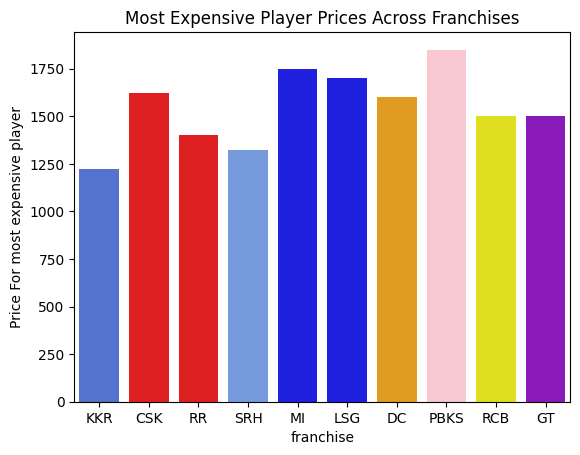

In [12]:
colors = ['royalblue','red','red','cornflowerblue','blue','blue','orange','pink','yellow','darkviolet'] 
sns.barplot(x=Most_exp_player_teamwise['franchise'],y=Most_exp_player_teamwise['final price (in lacs)'],palette=colors)
plt.ylabel('Price For most expensive player')
plt.title('Most Expensive Player Prices Across Franchises')
plt.show()

In [13]:
Most_Expensive_bowler=df[df['player style']=='Bowler'][df[df['player style']=='Bowler']['final price (in lacs)']==df[df['player style']=='Bowler']['final price (in lacs)'].max()][['player style','name','franchise','final price (in lacs)']]
Most_Expensive_batsman=df[df['player style']=='Batter'][df[df['player style']=='Batter']['final price (in lacs)']==df[df['player style']=='Batter']['final price (in lacs)'].max()][['player style','name','franchise','final price (in lacs)']]
Most_Expensive_allrounder=df[df['player style']=='Allrounder'][df[df['player style']=='Allrounder']['final price (in lacs)']==df[df['player style']=='Allrounder']['final price (in lacs)'].max()][['player style','name','franchise','final price (in lacs)']]
Most_Expensive_WicketKipper=df[df['player style']=='WK-Batter'][df[df['player style']=='WK-Batter']['final price (in lacs)']==df[df['player style']=='WK-Batter']['final price (in lacs)'].max()][['player style','name','franchise','final price (in lacs)']]
Most_exp_player_rolewise=pd.concat([Most_Expensive_bowler,Most_Expensive_batsman,Most_Expensive_allrounder,Most_Expensive_WicketKipper],ignore_index=True)
Most_exp_player_rolewise

,player style,name,franchise,final price (in lacs)
0,Bowler,Rashid Khan,GT,1500.0
1,Batter,Rohit Sharma,MI,1600.0
2,Allrounder,Sam Curran,PBKS,1850.0
3,WK-Batter,KL Rahul,LSG,1700.0


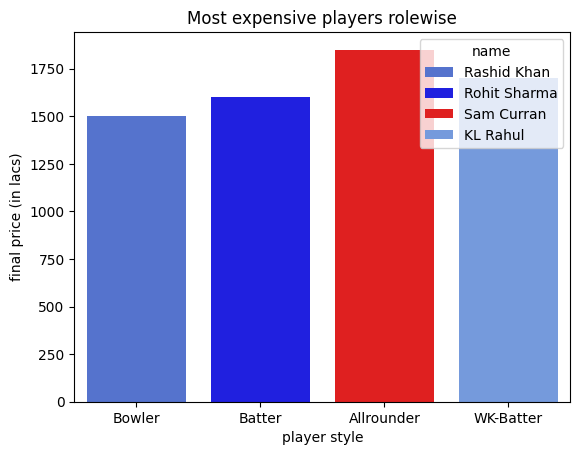

In [14]:
sns.barplot(x=Most_exp_player_rolewise['player style'],y=Most_exp_player_rolewise['final price (in lacs)'],hue=Most_exp_player_rolewise['name'],dodge=False,palette=['royalblue','blue','red','cornflowerblue'])
plt.title('Most expensive players rolewise')
plt.show()

#### Observations
1. **Most expensive player** in ipl 2023 auction was Sam curran and punjab bought him .
2. **Most expansive Bowler** - Rashid khan (GT)
3. **Most expensive batter**-  Rohit Sharma(MI)
4. **Most expensive Allrounder**- Sam curran (PBKS)
5. **Most expensive Wk-batter**- KL Rahul (LSG)


### Retained players analysis

In [15]:
Retained_df=df[df['status']=='RETAINED']
Retained_df.sort_values(by='final price (in lacs)',ascending=False)

,Unnamed: 0,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
292,292,KL Rahul,WK-Batter,India,20.0,1700.0,LSG,RETAINED
307,307,Rishabh Pant,WK-Batter,India,20.0,1600.0,DC,RETAINED
296,296,Ravindra Jadeja,Allrounder,India,20.0,1600.0,CSK,RETAINED
290,290,Rohit Sharma,Batter,India,20.0,1600.0,MI,RETAINED
230,230,Ishan Kishan,WK-Batter,India,20.0,1525.0,MI,RETAINED
...,...,...,...,...,...,...,...,...
152,152,Rajat Patidar,Batter,India,20.0,20.0,RCB,RETAINED
229,229,Darshan Nalkande,Bowler,India,20.0,20.0,GT,RETAINED
227,227,Vicky Ostwal,Allrounder,India,20.0,20.0,DC,RETAINED
224,224,Ripal Patel,Allrounder,India,20.0,20.0,DC,RETAINED


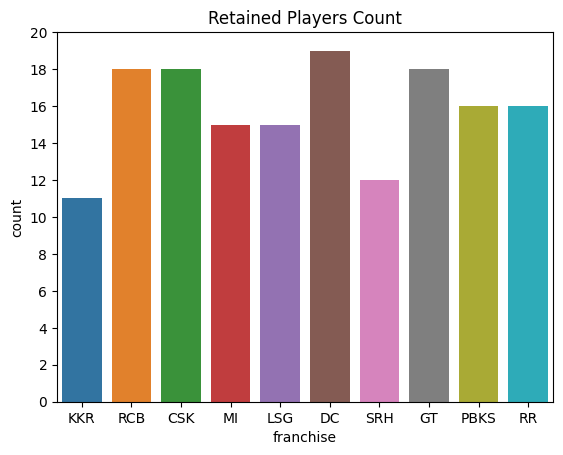

In [16]:
sns.countplot(Retained_df,x=Retained_df['franchise'])
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.title('Retained Players Count')
plt.show()

#### Observations 
1. There were total **158 retained players** in ipl 2023.
2. From the above plot we can see DC retained 19 players( which is max) in ipl 2023 and KKR retained least 11 players 
3. Top **5 Most Expensive retained players** were - KL Rahul , Rishabh pant , Ravindra jadeja , Rohit Sharma and Ishan kishan

### Player Style Analysis 

In [17]:
counts_df=pd.DataFrame(df['player style'].value_counts().reset_index(),columns=['player style','count'])
counts_df

,player style,count
0,Bowler,111
1,Allrounder,103
2,Batter,55
3,WK-Batter,40


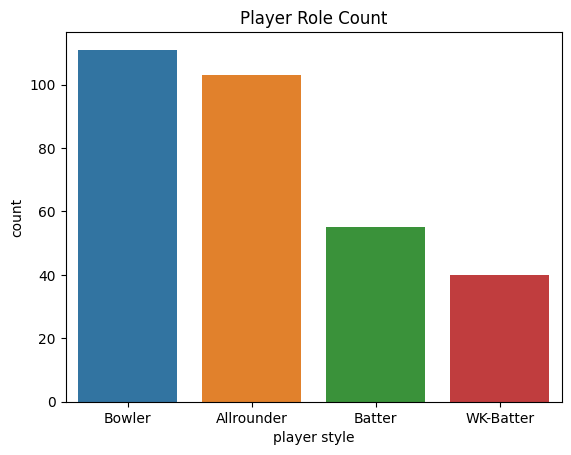

In [18]:
sns.barplot(x=counts_df['player style'],y=counts_df['count'])
plt.title('Player Role Count')
plt.show()

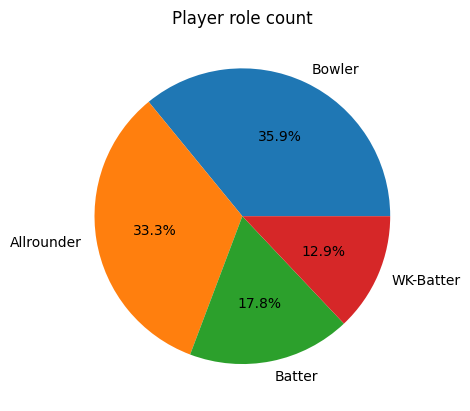

In [19]:
plt.pie(counts_df['count'],labels=counts_df['player style'],autopct='%1.1f%%')
plt.title('Player role count')
plt.show()


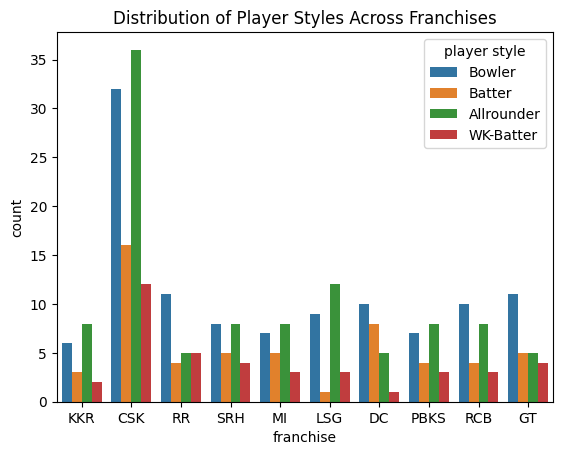

In [20]:
sns.countplot(x=df['franchise'],hue=df['player style'])
plt.title('Distribution of Player Styles Across Franchises')
plt.show()

#### Observations
1. In the Data set there were **111 Bowlers (35.9%) , 103 Allrounders (33.3%) , 55 Batter (17.8%) and 40 Wicket Keeper (12.9%)** . So we can say that there was a **high demand of bowlers and allrounders in ipl 2023**
2. Almost 50%  of the teams prefer more allrounders than bowlers and batter. Rest of the teams have prefered more bowlers

### Franchise and Nationality analysis

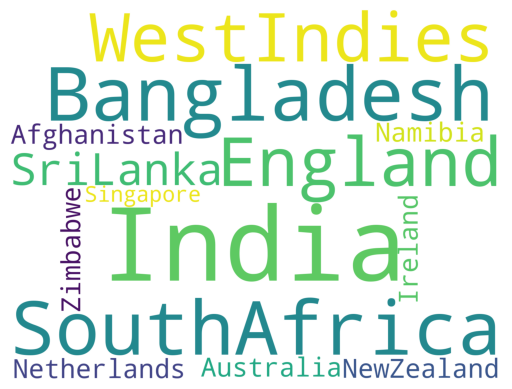

In [21]:
from wordcloud import WordCloud
l=[]
for i in list(df['nationality'].unique()):
    s=i.split()
    l.append(''.join(s))
text=','.join(l)
wordcloud = WordCloud(width=1600, height=1200, background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

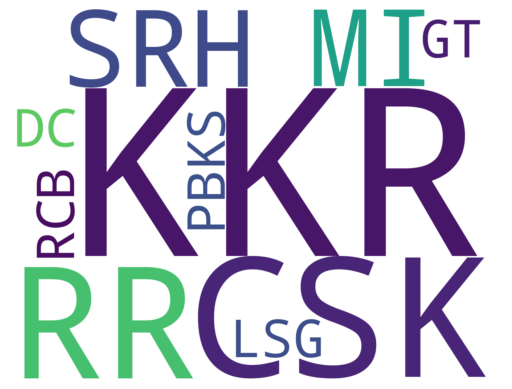

In [22]:
teams=list(df['franchise'].unique())
txt=','.join(teams)
wordcloud = WordCloud(width=1600, height=1200, background_color='white').generate(txt)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') 
plt.show()

In [23]:
Nationality_count=pd.DataFrame(df['nationality'].value_counts().reset_index())
Nationality_count

,nationality,count
0,India,201
1,England,24
2,South Africa,19
3,West Indies,14
4,Australia,14
5,New Zealand,11
6,Sri Lanka,8
7,Afghanistan,7
8,Bangladesh,4
9,Ireland,2


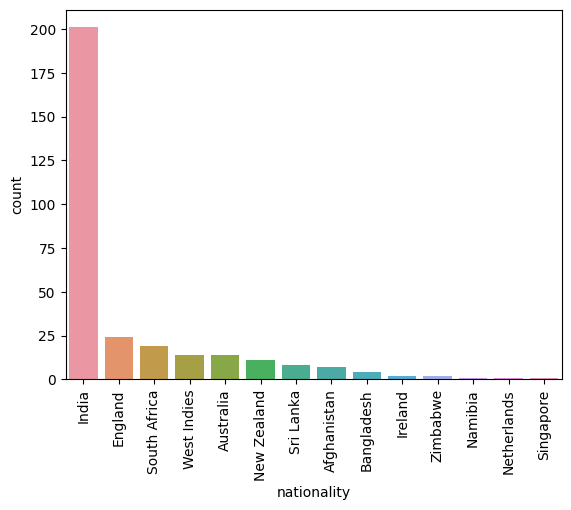

In [24]:
sns.barplot(x=Nationality_count['nationality'],y=Nationality_count['count'])
plt.tick_params(axis='x', rotation=90)  

#### Observations-
1. Total 14 Country particpiated in IPL 2023 and there were 10 IPl Teams
2. Top 5 countries who has participated in ipl 2023 were India , England , South Africa , West Indies and Australia 

### Players Status Count Analysis 

In [25]:
status_counts=pd.DataFrame(df['status'].value_counts()).reset_index()
status_counts


,status,count
0,RETAINED,158
1,SOLD,80
2,UNSOLD,71


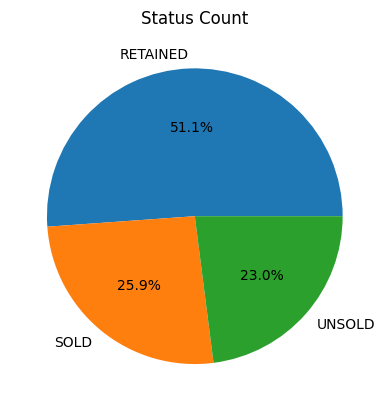

In [26]:
plt.pie(status_counts['count'],labels=status_counts['status'],autopct='%1.1f%%')
plt.title('Status Count')
plt.show()

#### Observations-
Out of 309 players 51.1 % players were retained and around 26 % players were sold . Rest of the 23% players were unsold in IPL 2023

### Most Valuable Player Analysis 

In [27]:
df['base_final_diff']=abs(df['base price (in lacs)']-df['final price (in lacs)'])
df.sort_values(by='base_final_diff',ascending=False).head(10)


,Unnamed: 0,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,base_final_diff
292,292,KL Rahul,WK-Batter,India,20.0,1700.0,LSG,RETAINED,1680.0
150,150,Sam Curran,Allrounder,England,200.0,1850.0,PBKS,SOLD,1650.0
307,307,Rishabh Pant,WK-Batter,India,20.0,1600.0,DC,RETAINED,1580.0
290,290,Rohit Sharma,Batter,India,20.0,1600.0,MI,RETAINED,1580.0
296,296,Ravindra Jadeja,Allrounder,India,20.0,1600.0,CSK,RETAINED,1580.0
148,148,Cameron Green,Allrounder,Australia,200.0,1750.0,MI,SOLD,1550.0
230,230,Ishan Kishan,WK-Batter,India,20.0,1525.0,MI,RETAINED,1505.0
301,301,Hardik Pandya,Allrounder,India,20.0,1500.0,GT,RETAINED,1480.0
282,282,Virat Kohli,Batter,India,20.0,1500.0,RCB,RETAINED,1480.0
300,300,Rashid Khan,Bowler,Afghanistan,20.0,1500.0,GT,RETAINED,1480.0


These were most valuable player according to ipl 2023 auction with very low base price and very high sold price 

In [28]:
df[df['base_final_diff']==df['base_final_diff'].min()]

,Unnamed: 0,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,base_final_diff
0,0,Harshit Rana,Bowler,India,20.0,20.0,KKR,RETAINED,0.0
3,3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD,0.0
4,4,Joe Root,Batter,England,100.0,100.0,RR,SOLD,0.0
5,5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD,0.0
7,7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD,0.0
...,...,...,...,...,...,...,...,...,...
257,257,Mohd Arshad Khan,Bowler,India,20.0,20.0,MI,RETAINED,0.0
259,259,Baltej Singh,Allrounder,India,20.0,20.0,PBKS,RETAINED,0.0
263,263,Hrithik Shokeen,Allrounder,India,20.0,20.0,MI,RETAINED,0.0
264,264,Kuldip Yadav,Bowler,India,20.0,20.0,RR,RETAINED,0.0


These were leasr valuable player according to ipl 2023 auction and they were sold at there base price only

### Spending pattern of each franchise

In [29]:
teams=list(df['franchise'].unique())

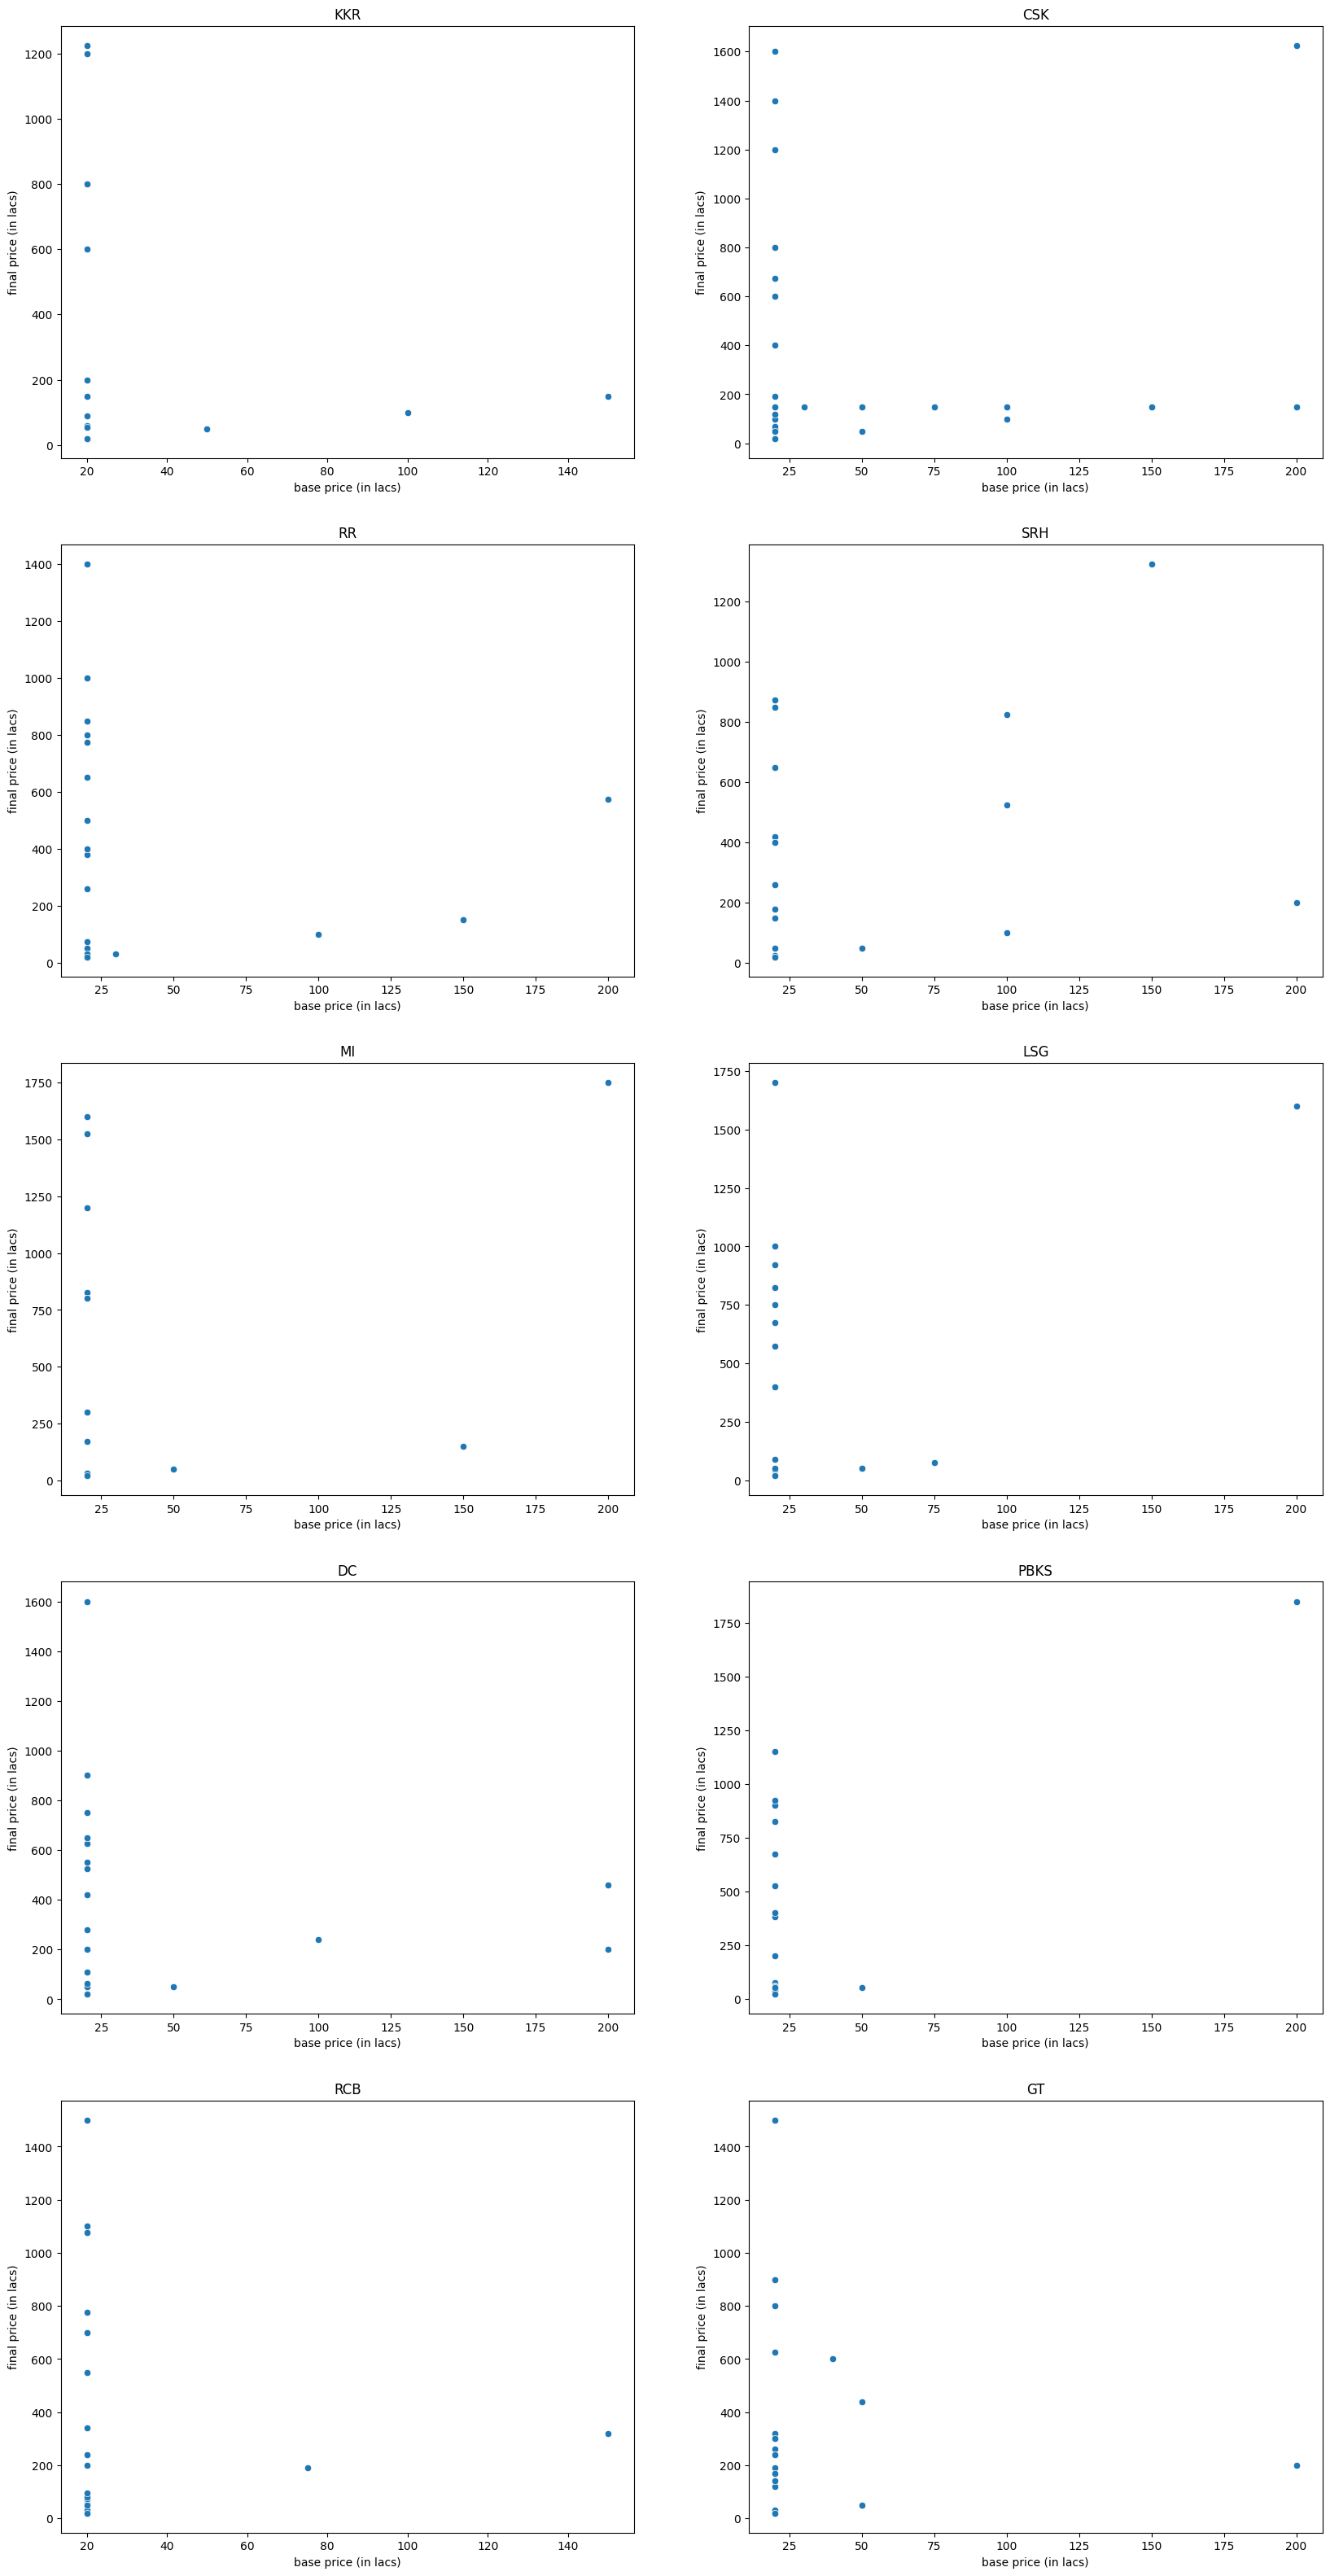

In [30]:
fig ,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,40))
for i,team in enumerate(teams):
    temp_df=df[df['franchise']==team]
    row=i//2
    col=i%2
    sns.scatterplot(x=temp_df['base price (in lacs)'],y=temp_df['final price (in lacs)'],ax=axes[row,col])
    axes[row,col].set_title(team)
    